In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import descartes
import geopandas as gpd

%matplotlib inline

In [2]:


street_map = gpd.read_file("./shapfiles/nyct2010_15b")

In [3]:
# street_map = street_map.to_crs(crs="+proj=longlat +datum=WGS84")
street_map = street_map.to_crs(crs={'proj': 'latlong', 'datum': 'WGS84'})
street_map.head(3)
print(street_map.head(3).iloc[1:2,11:12]['geometry'])

/Users/yogiman/Workspace/Cache/xuyuji9000/jupyter-playground/venv/lib/python3.7/site-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


1    POLYGON ((-74.11619 40.62894, -74.11614 40.628...
Name: geometry, dtype: geometry


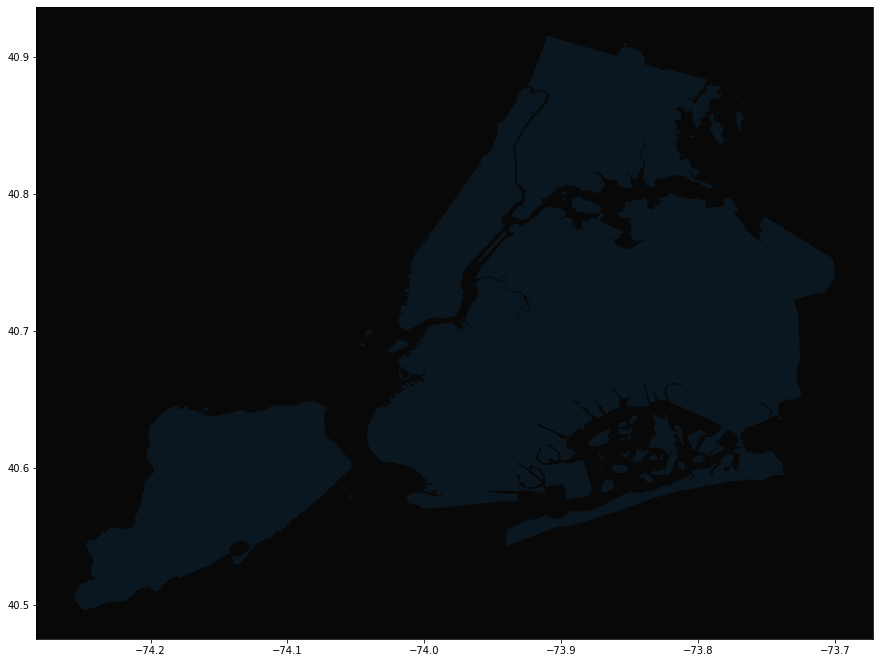

In [5]:
fig,ax = plt.subplots(figsize = (15, 15))
ax.set_facecolor('#080808')
street_map.plot(ax=ax, alpha=0.14)